<a href="https://colab.research.google.com/github/tbazzi/Data-Science---Fullstack-Bootcamp/blob/master/S3_3_1_R%C3%A9gressions_R%C3%A9gularis%C3%A9es_Ridge_Exercice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Régression Régularisées : RIDGE


0. Importez les libairies usuelles 

In [0]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as plt

  1. Chargez en mémoire le dataset des prix des logements à boston grâce à la commande :
  
 
```
from sklearn.datasets import load_boston
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
```

In [0]:
from sklearn.datasets import load_boston
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


  2. Créez un dataframe contenant les variables explicatives et un autre contenant uniquement la variable cible qui est le prix des maisons

In [0]:
y = pd.DataFrame(data = boston.target.tolist())
X = boston_df
y.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


,prices
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


3. Utilisez la commande `train_test_split ` du package `sklearn.model_selection`  afin de créer un échantillon d’entraînement contenant 70% des observations et un échantillon test contenant 30% des observations.

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30,  random_state = 42)

In [0]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()

X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

4. Générer un modèle de régression linéaire classique, un modèle ridge où alpha vaut 0.01 et un modèle ridge où alpha vaut 100.

In [0]:

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
lr = LinearRegression()
lr.fit(X_train, y_train)

rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)

rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)
train_score=lr.score(X_train, y_train)

test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print ("linear regression train score:", train_score)
print ("linear regression test score:", test_score)
print ("ridge regression train score low alpha:", Ridge_train_score)
print ("ridge regression test score low alpha:", Ridge_test_score)
print ("ridge regression train score high alpha:", Ridge_train_score100)
print ("ridge regression test score high alpha:", Ridge_test_score100)

linear regression train score: 0.7434997532004697
linear regression test score: 0.7112260057484932
ridge regression train score low alpha: 0.7434997513577425
ridge regression test score low alpha: 0.7112218117529641
ridge regression train score high alpha: 0.7174381537241792
ridge regression test score high alpha: 0.6842994660036883


5. Entraînez ces modèles sur les données sur les données d’apprentissage

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

6. Produisez les scores de performance de c’est trois modèles sur l’échantillon d’apprentissage et de validation grâce à l’attribut .score

Linear Regression score : 0.7604714063241723
Ridge with small Alpha score : 0.7604290688111183
Ridge with large Alpha score : 0.7460532092278869


7. Comparez les coefficients des trois modèle à l’aide d’un graphique, que remarquez vous ?

In [0]:
coefs = pd.DataFrame(index=boston_df.columns, data = abs(lr.coef_.transpose()), columns=["coefficients_LR"])
coefs["coefficients_RR"]= abs(rr.coef_.transpose())
coefs["coefficients_RR100"]= abs(rr100.coef_.transpose())
coefs = coefs.sort_values(by = "coefficients_LR", ascending=False)
coefs

,coefficients_LR,coefficients_RR,coefficients_RR100
LSTAT,3.885790,3.885642,2.958424
DIS,2.942511,2.942103,1.314173
RM,2.913858,2.913922,2.770821
RAD,2.094193,2.093345,0.320938
PTRATIO,2.052322,2.052208,1.559071
NOX,1.798043,1.797670,0.655938
TAX,1.447067,1.446323,0.386716
CRIM,1.108346,1.108218,0.728153
B,1.023752,1.023724,0.837850
CHAS,0.813864,0.813922,0.912049


,features,coef_linear_regressor,coef_abs_linear_regressor,coef_ridge_small_alpha,coef_abs_ridge_small_alpha,coef_ridge_large_alpha,coef_abs_ridge_large_alpha
0,CRIM,-0.100473,0.100473,-0.100380,0.100380,-0.102537,0.102537
1,ZN,0.048546,0.048546,0.048573,0.048573,0.059268,0.059268
2,INDUS,0.075302,0.075302,0.074618,0.074618,0.004641,0.004641
3,CHAS,2.677793,2.677793,2.676268,2.676268,0.493972,0.493972
4,NOX,-16.554965,16.554965,-16.406109,16.406109,-0.176860,0.176860


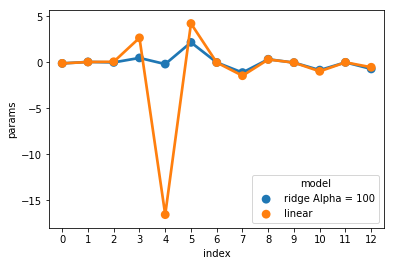

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge = Ridge()

parameters = {'alpha': np.arange(0,100,1)}
#cv = cross validation
ridge_regressor = GridSearchCV(ridge, param_grid = parameters,  cv=10)
ridge_regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)


{'alpha': 18}
0.6893535063578221
